<h2><center>Author: Ricardo Manzano Sanchez.</center></h2>
<h2><center>Email: ricardoamsrams@gmail.com</center></h2>

The main goal of the present report is to show different techniques of normalization and scalation in the first part. In the second part has the objective to analyze different distance metrics among instances. Finally, the third part has the goal to show graphically the differences among normalization methods. In this assignment has been used the dataset "Wine quality" that can be downloaded from http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. This dataset has the following columns or attributes

   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4. residual sugar
   5. chlorides
   6. free sulfur dioxide
   7. total sulfur dioxide
   8. density
   9. pH
   10. sulphates
   11. alcohol
   12. quality (score between 0 and 10)

Attributes between 1 to 11 have been considered features while the attribute 12 is the output or label of the dataset. For this reason, all the questions of this homework will be answered using the attributes between 1 to 11.
4 libraries will be used in the present homework pandas, matplotlib, numpy and sklearn.

Pandas is useful to work with dataframes. It has thousand of functions to calculate statistics, difficult operations with dataframes. 

Numpy is powerful to work multidimensional vectors, linear algebra, transformations, statistics and other functions. 

Matplotlib is one of the most powerful tools to plot data with high quality and performance.

Sklearn has important algorithms related with big data to pre-process data, create classification and regression models.  

At the beginning, it is necessary to import the libraries that we need to accomplish the requirements of the homework. In the next lines are imported all the libraries.


In [1]:
# import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity


To import the data "Wine quality" to phyton, it is necessary to declare the path where this file.csv was saved. After to declare the path, the function pd.read_csv from Pandas library is used to read the file __winequality-red.csv__ which has the data of interest.

This file is imported into phyton as a dataframe; therefore, it is necessary to use dataframe operations from pandas to work with this data.

In [2]:
path = 'C:\\RICARDO\\winequality-red.csv'
a=pd.read_csv(path,delimiter=";")

The first requirement of the homework is select the first 10 instances of the database. In addition, as we described the column 12 is considered a label; thus, it is excluded of the data. These two requirements are accomplished using the function iloc from pandas.

In [3]:
a=a.iloc[0:10,0:11]
print(a)
#,names=('fixed acidity', 'volatile acidity', 'citric acid',' residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'))
a.to_csv('ass2.csv', sep=',')

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

NORMALIZATION

In this section, we normalize the attributes using different kind of methods. 
The first method used is min-max normalization. For each attribute is applied the following formula
$$X'=\frac{X-X_{min}}{X_{max}-X_{min}}$$
To apply this formula efficiently the library MinMaxScaler from sklearn has been used. As we can see in the following lines of code


In [4]:
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
scaler_minmax  = scaler_minmax.fit(a)
normalized_minmax = scaler_minmax.transform(a)
for i in range(10):
	print(normalized_minmax[i])
print("\t\t\t\t\t")


[0.02564103 0.7        0.         0.14285714 0.33333333 0.125
 0.19047619 0.94117647 1.         0.29411765 0.        ]
[0.12820513 1.         0.         0.28571429 1.         1.
 0.58333333 0.64705882 0.11428571 0.64705882 0.36363636]
[0.12820513 0.8        0.07142857 0.2244898  0.81818182 0.375
 0.42857143 0.70588235 0.28571429 0.55882353 0.36363636]
[1.         0.         1.         0.14285714 0.3030303  0.5
 0.5        1.         0.         0.35294118 0.36363636]
[0.02564103 0.7        0.         0.14285714 0.33333333 0.125
 0.19047619 0.94117647 1.         0.29411765 0.        ]
[0.02564103 0.63333333 0.         0.12244898 0.3030303  0.25
 0.26190476 0.94117647 1.         0.29411765 0.        ]
[0.15384615 0.53333333 0.10714286 0.08163265 0.12121212 0.375
 0.48809524 0.52941176 0.4        0.         0.        ]
[0.         0.61666667 0.         0.         0.         0.375
 0.03571429 0.         0.65714286 0.02941176 0.54545455]
[0.12820513 0.5        0.03571429 0.16326531 0.2424242

The second normalization applied to the data is z-score normalized values. In this case the following mathematical expression is applied to each column or attribute
$$Z=\frac{X-\mu}{\sigma}$$.
To apply this equation in a fast and precise way. It is used the function StandardScaler from sklearn to accomplish this requeriment.

In [5]:
scaler_us =StandardScaler()
scaler_us = scaler_us.fit(a)
normalized_us = scaler_us.transform(a)
for i in range(10):
	print(normalized_us[i])
print("\t\t\t\t\t")

[-0.49866241  0.45175298 -0.5634891  -0.32939797 -0.10336228 -0.89666544
 -0.62657607  0.73120002  1.27646617 -0.30519553 -0.88083033]
[-0.13599884  1.63023903 -0.5634891   0.20683128  2.17060786  2.40683881
  0.76114274 -0.28435556 -1.27646617  0.95768253  0.29361011]
[-0.13599884  0.84458166 -0.34676252 -0.02298125  1.55043418  0.04719292
  0.21446563 -0.08124445 -0.78235023  0.64196302  0.29361011]
[ 2.94664152 -2.29804778  2.47068296 -0.32939797 -0.20672456  0.5191221
  0.46677815  0.93431113 -1.6058768  -0.09471585  0.29361011]
[-0.49866241  0.45175298 -0.5634891  -0.32939797 -0.10336228 -0.89666544
 -0.62657607  0.73120002  1.27646617 -0.30519553 -0.88083033]
[-0.49866241  0.1898672  -0.5634891  -0.40600215 -0.20672456 -0.42473626
 -0.37426356  0.73120002  1.27646617 -0.30519553 -0.88083033]
[-0.04533295 -0.20296149 -0.23839923 -0.55921051 -0.82689823  0.04719292
  0.42472606 -0.69057779 -0.45293961 -1.35759392 -0.88083033]
[-0.5893283   0.12439575 -0.5634891  -0.86562722 -1.2403

Finally, to normalized the data using mean subtracted normalization, it is necessary to apply to each attribute the following mathematical expression
$$X'={X-\mu}$$.
To accomplish this requeriment, due to the fact that a direct function does not exist in Sklearn, a manually procedure has been followed as it is shown in the next lines of code

In [6]:
normalized_u=np.zeros(shape=(10,11))
for i in range(0,11):
    ta=a.iloc[:,i]
    tas=ta.mean()
    normalized_u[:,i]=a.iloc[:,i]-tas
print(normalized_u)

[[-5.50e-01  6.90e-02 -1.04e-01 -4.30e-01 -1.00e-03 -3.80e+00 -1.49e+01
   7.20e-04  1.55e-01 -2.90e-02 -3.00e-01]
 [-1.50e-01  2.49e-01 -1.04e-01  2.70e-01  2.10e-02  1.02e+01  1.81e+01
  -2.80e-04 -1.55e-01  9.10e-02  1.00e-01]
 [-1.50e-01  1.29e-01 -6.40e-02 -3.00e-02  1.50e-02  2.00e-01  5.10e+00
  -8.00e-05 -9.50e-02  6.10e-02  1.00e-01]
 [ 3.25e+00 -3.51e-01  4.56e-01 -4.30e-01 -2.00e-03  2.20e+00  1.11e+01
   9.20e-04 -1.95e-01 -9.00e-03  1.00e-01]
 [-5.50e-01  6.90e-02 -1.04e-01 -4.30e-01 -1.00e-03 -3.80e+00 -1.49e+01
   7.20e-04  1.55e-01 -2.90e-02 -3.00e-01]
 [-5.50e-01  2.90e-02 -1.04e-01 -5.30e-01 -2.00e-03 -1.80e+00 -8.90e+00
   7.20e-04  1.55e-01 -2.90e-02 -3.00e-01]
 [-5.00e-02 -3.10e-02 -4.40e-02 -7.30e-01 -8.00e-03  2.00e-01  1.01e+01
  -6.80e-04 -5.50e-02 -1.29e-01 -3.00e-01]
 [-6.50e-01  1.90e-02 -1.04e-01 -1.13e+00 -1.20e-02  2.00e-01 -2.79e+01
  -2.48e-03  3.50e-02 -1.19e-01  3.00e-01]
 [-1.50e-01 -5.10e-02 -8.40e-02 -3.30e-01 -4.00e-03 -5.80e+00 -3.09e+01
  -2.80e

Type of distances

In this section, it is necessary to determine which is the minimun and the maximun distance metric for each instance considering the remaining instances of the reduced dataset.
The first distance to determine is euclidean distance. To determine this distance, it is necessary to apply the following mathematical expression 

$$d=\sqrt{\sum_{i=1}^{11}( {X_{i}-Y_{i}})^2}$$

Where $X_{i}$ is one instance, and $Y_{i}$ is another instance. The value of 11 are the number of attributes considered in the euclidean distance. 
To apply this equation in a fast way is used a library from skelearn as follows.


In [7]:
y=a.iloc[:,:]
print("Data to find euclidean distance")
#print(y)
print("\t")
dist_euclidean = DistanceMetric.get_metric('euclidean')
dmax_euclidean=dist_euclidean.pairwise(y)
dmin_euclidean=dist_euclidean.pairwise(y)
print("Euclidean distance")
print(dmax_euclidean)
print("\t")


Data to find euclidean distance
	
Euclidean distance
[[ 0.         35.86019221 20.40970496 26.96688527  0.          6.32547239
  25.32602912 13.63396975 16.13125569 68.404041  ]
 [35.86019221  0.         16.40458887 11.21319448 35.86019221 29.56551082
  12.85734192 47.09972605 51.55170923 36.0851996 ]
 [20.40970496 16.40458887  0.          7.22744699 20.40970496 14.16518583
   5.07190589 33.02368445 36.49972001 48.19980334]
 [26.96688527 11.21319448  7.22744699  0.         26.96688527 20.76513665
   4.06527226 39.25882845 42.89617355 42.37915662]
 [ 0.         35.86019221 20.40970496 26.96688527  0.          6.32547239
  25.32602912 13.63396975 16.13125569 68.404041  ]
 [ 6.32547239 29.56551082 14.16518583 20.76513665  6.32547239  0.
  19.1141659  19.12466236 22.36603239 62.28923194]
 [25.32602912 12.85734192  5.07190589  4.06527226 25.32602912 19.1141659
   0.         38.01176554 41.4390844  43.29940076]
 [13.63396975 47.09972605 33.02368445 39.25882845 13.63396975 19.12466236
  38.01

To calculate the manhattan distance is used the following expression
$$m={\sum_{i=1}^{11}\mid {X_{i}-Y_{i}}\mid}$$
Where i is the attribute, $X_{i}$ is one instance, and $Y_{i}$ is another instance.
To calculate the manhattan distance among all the the instances is used a function of sklearn as follows


In [8]:
dist_manhattan = DistanceMetric.get_metric('manhattan')
dmax_manhattan=dist_manhattan.pairwise(y)
dmin_manhattan=dist_manhattan.pairwise(y)
print("\t Manhattan distance")
print(dmax_manhattan)
print("\t")


	 Manhattan distance
[[ 0.     49.133  25.6568 37.5512  0.      8.141  30.2784 18.6742 18.904
  80.365 ]
 [49.133   0.     23.5562 20.4242 49.133  41.274  20.1894 58.7652 66.515
  48.538 ]
 [25.6568 23.5562  0.     12.988  25.6568 17.7978  6.6336 35.2894 42.9992
  55.6418]
 [37.5512 20.4242 12.988   0.     37.5512 29.6102  8.0876 47.0834 54.8532
  51.4342]
 [ 0.     49.133  25.6568 37.5512  0.      8.141  30.2784 18.6742 18.904
  80.365 ]
 [ 8.141  41.274  17.7978 29.6102  8.141   0.     22.1374 22.5332 26.963
  72.424 ]
 [30.2784 20.1894  6.6336  8.0876 30.2784 22.1374  0.     39.8158 47.8344
  51.7934]
 [18.6742 58.7652 35.2894 47.0834 18.6742 22.5332 39.8158  0.     11.0302
  89.4892]
 [18.904  66.515  42.9992 54.8532 18.904  26.963  47.8344 11.0302  0.
  98.063 ]
 [80.365  48.538  55.6418 51.4342 80.365  72.424  51.7934 89.4892 98.063
   0.    ]]
	


Finally, to determine the cosine distance among all the instances is used a function of sklearn as follows

In [9]:
print("Cosine distance")
dmax_cosine=cosine_similarity(y)
dmin_cosine=cosine_similarity(y)
print(dmax_cosine)

Cosine distance
[[1.         0.98659737 0.99315648 0.99285213 1.         0.99881818
  0.98925802 0.9524558  0.96433102 0.96810503]
 [0.98659737 1.         0.99527462 0.99427713 0.98659737 0.99307901
  0.99393887 0.92977556 0.92055875 0.98050942]
 [0.99315648 0.99527462 1.         0.9989157  0.99315648 0.99720891
  0.9994156  0.91986199 0.92735937 0.98947244]
 [0.99285213 0.99427713 0.9989157  1.         0.99285213 0.99666649
  0.9984373  0.92149576 0.92961129 0.98669853]
 [1.         0.98659737 0.99315648 0.99285213 1.         0.99881818
  0.98925802 0.9524558  0.96433102 0.96810503]
 [0.99881818 0.99307901 0.99720891 0.99666649 0.99881818 1.
  0.99441713 0.9450927  0.95208809 0.9763929 ]
 [0.98925802 0.99393887 0.9994156  0.9984373  0.98925802 0.99441713
  1.         0.90737361 0.91560403 0.9929439 ]
 [0.9524558  0.92977556 0.91986199 0.92149576 0.9524558  0.9450927
  0.90737361 1.         0.9842541  0.85443233]
 [0.96433102 0.92055875 0.92735937 0.92961129 0.96433102 0.95208809
  0.9

The requirement of the homework is present the minimun and the maximun distance for each instance. The following lines of code retrieve this information of the matrices exposed above.
The results are presented in two matrices. The first matrix shows the values of the min and the max distances to each instance, while the matrix 2 shows the number instance which has the minimun and the number of instance that has the maximum value. It is necessary to highlight that it is necessary to modify the values of the diagonal with the goal that these values have not been considered in the selection of the maximum and the minimun. This procedure has been done before to extract the min and the max for each instance

For the euclidean distance the results are shown below:

In [10]:
#EUCLIDEAN 
dmax_euclidean[np.diag_indices_from(dmax_euclidean)]=-np.inf
dmax_euclidean=dmax_euclidean
#np.savetxt("dmax_euclidean.csv",dmax_euclidean, delimiter=",")

dmin_euclidean[np.diag_indices_from(dmin_euclidean)]=np.inf
dmin_euclidean=dmin_euclidean
#np.savetxt("dmin_euclidean.csv", dmin_euclidean, delimiter=",")
#print("Euclidean distance max\t")
#print(dmax_euclidean)
#print("\t")
#print("Euclidean distance min\t")
#print(dmin_euclidean)


result1_euclidean=np.zeros(shape=(10,2))
result2_euclidean=np.zeros(shape=(10,2))
for i in range(10):
        min1=min(dmin_euclidean[:,i])
        gmin=np.argmin(dmin_euclidean[:,i])
        max1=max(dmax_euclidean[:,i])
        gmax=np.argmax(dmax_euclidean[:,i])
        result1_euclidean[i,0]=min1
        result1_euclidean[i,1]=max1
        result2_euclidean[i,0]=gmin
        result2_euclidean[i,1]=gmax

print("\t")
print("Euclidean distance results\t")    
print("Euclidean distance results min-max values\t") 
print(result1_euclidean)
print("\t")
print("Euclidean distance results min-max number of \t") 
print(result2_euclidean)


	
Euclidean distance results	
Euclidean distance results min-max values	
[[ 0.         68.404041  ]
 [11.21319448 51.55170923]
 [ 5.07190589 48.19980334]
 [ 4.06527226 42.89617355]
 [ 0.         68.404041  ]
 [ 6.32547239 62.28923194]
 [ 4.06527226 43.29940076]
 [ 6.79384051 81.17612116]
 [ 6.79384051 84.48712923]
 [36.0851996  84.48712923]]
	
Euclidean distance results min-max number of 	
[[4. 9.]
 [3. 8.]
 [6. 9.]
 [6. 8.]
 [0. 9.]
 [0. 9.]
 [3. 9.]
 [8. 9.]
 [7. 9.]
 [1. 8.]]


For the manhattan distance

In [11]:

#MANHATTAN
dmax_manhattan[np.diag_indices_from(dmax_manhattan)]=-np.inf
dmax_manhattan=dmax_manhattan
np.savetxt("dmax_manhattan.csv",dmax_manhattan, delimiter=",")

dmin_manhattan[np.diag_indices_from(dmin_manhattan)]=np.inf
dmin_manhattan=dmin_manhattan
#np.savetxt("dmin_euclidean.csv",dmin_manhattan, delimiter=",")
#print("Manhattan distance max\t")
#print(dmax_manhattan)
#print("\t")
#print("Manhattan distance min\t")
#print(dmin_manhattan)

result1_manhattan=np.zeros(shape=(10,2))
result2_manhattan=np.zeros(shape=(10,2))
for i in range(10):
        min1=min(dmin_manhattan[:,i])
        gmin=np.argmin(dmin_manhattan[:,i])
        max1=max(dmax_manhattan[:,i])
        gmax=np.argmax(dmax_manhattan[:,i])
        result1_manhattan[i,0]=min1
        result1_manhattan[i,1]=max1
        result2_manhattan[i,0]=gmin
        result2_manhattan[i,1]=gmax

print("\t")
print("manhattan distance results\t")    
print("manhattan distance results min-max values\t") 
print(result1_manhattan)
print("\t")
print("manhattan distance results min-max positions\t") 
print(result2_manhattan)





	
manhattan distance results	
manhattan distance results min-max values	
[[ 0.     80.365 ]
 [20.1894 66.515 ]
 [ 6.6336 55.6418]
 [ 8.0876 54.8532]
 [ 0.     80.365 ]
 [ 8.141  72.424 ]
 [ 6.6336 51.7934]
 [11.0302 89.4892]
 [11.0302 98.063 ]
 [48.538  98.063 ]]
	
manhattan distance results min-max positions	
[[4. 9.]
 [6. 8.]
 [6. 9.]
 [6. 8.]
 [0. 9.]
 [0. 9.]
 [2. 9.]
 [8. 9.]
 [7. 9.]
 [1. 8.]]


For the cosine distance

In [12]:

#COSINE
dmax_cosine[np.diag_indices_from(dmax_cosine)]=-np.inf
dmax_cosine=dmax_cosine
#np.savetxt("dmax_cosine.csv",dmax_cosine, delimiter=",")

dmin_cosine[np.diag_indices_from(dmin_cosine)]=np.inf
dmin_cosine=dmin_cosine
#np.savetxt("dmin_cosine.csv",dmin_cosine, delimiter=",")
#print("cosine distance max\t")
#print(dmax_cosine)
#print("\t")
#print("cosinedistance min\t")
#print(dmin_cosine)


result1_cosine=np.zeros(shape=(10,2))
result2_cosine=np.zeros(shape=(10,2))
for i in range(10):
        min1=min(dmin_cosine[:,i])
        gmin=np.argmin(dmin_cosine[:,i])
        max1=max(dmax_cosine[:,i])
        gmax=np.argmax(dmax_cosine[:,i])
        result1_cosine[i,0]=min1
        result1_cosine[i,1]=max1
        result2_cosine[i,0]=gmin
        result2_cosine[i,1]=gmax

print("\t")
print("cosine distance results\t")    
print("cosine distance results min-max values\t") 
print(result1_cosine)
print("\t")
print("cosine distance results min-max positions\t") 
print(result2_cosine)



	
cosine distance results	
cosine distance results min-max values	
[[0.9524558  1.        ]
 [0.92055875 0.99527462]
 [0.91986199 0.9994156 ]
 [0.92149576 0.9989157 ]
 [0.9524558  1.        ]
 [0.9450927  0.99881818]
 [0.90737361 0.9994156 ]
 [0.85443233 0.9842541 ]
 [0.86885558 0.9842541 ]
 [0.85443233 0.9929439 ]]
	
cosine distance results min-max positions	
[[7. 4.]
 [8. 2.]
 [7. 6.]
 [7. 2.]
 [7. 0.]
 [7. 0.]
 [7. 2.]
 [9. 8.]
 [9. 7.]
 [7. 6.]]


In this section, we plot each pair of attributes comparing different normalization methods. This was done using a loop and finding all the possible combinations

c:\users\ramanzan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


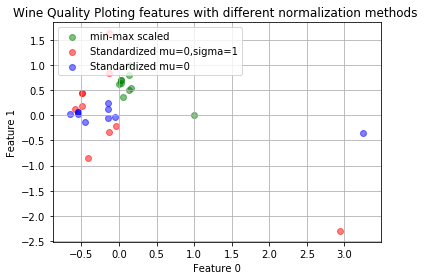

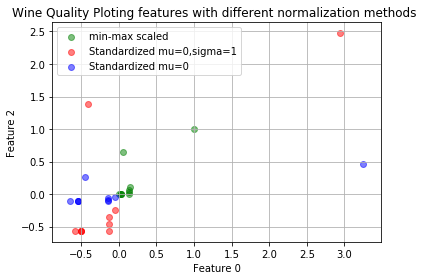

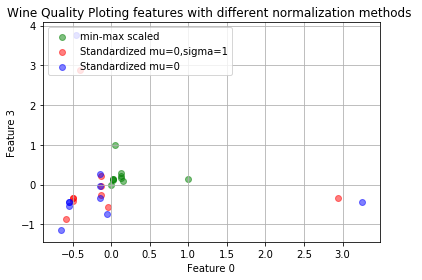

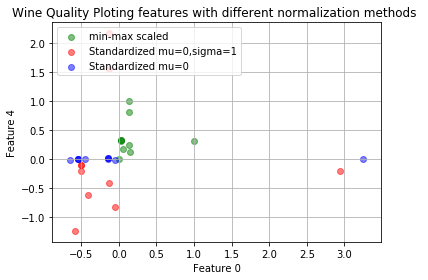

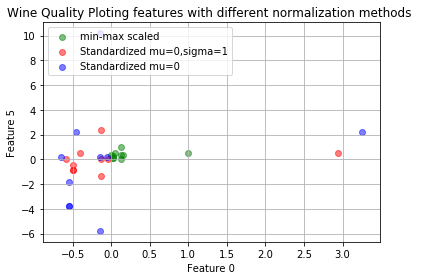

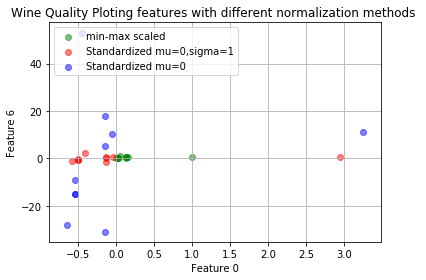

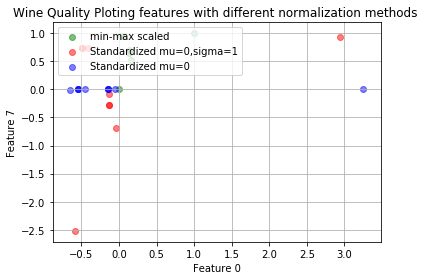

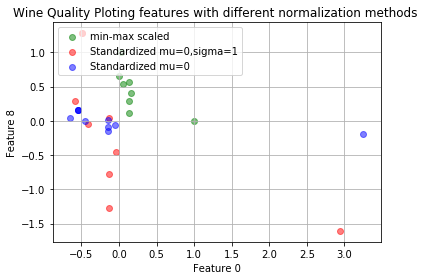

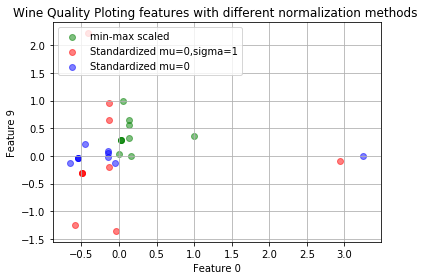

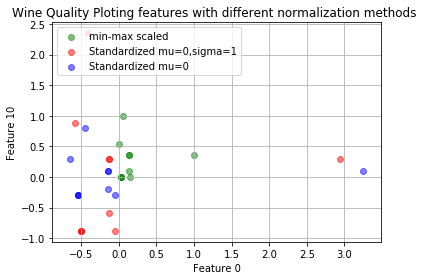

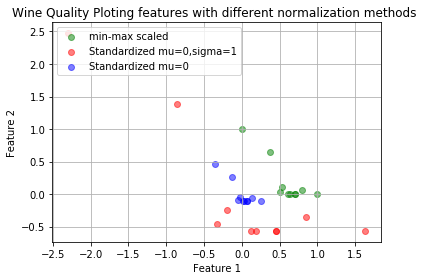

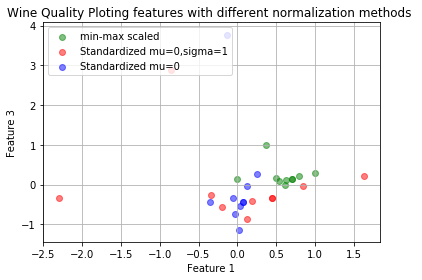

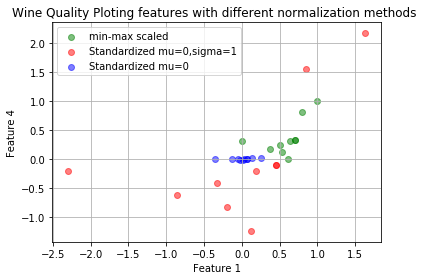

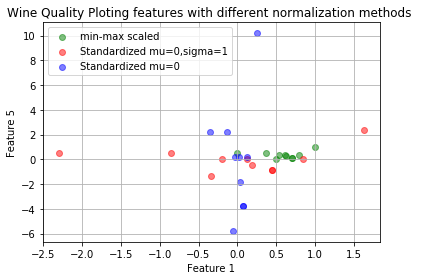

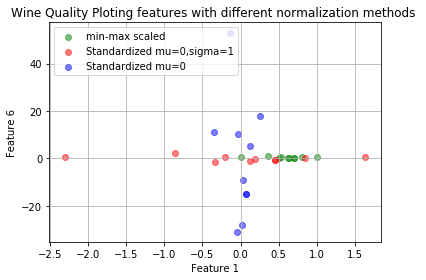

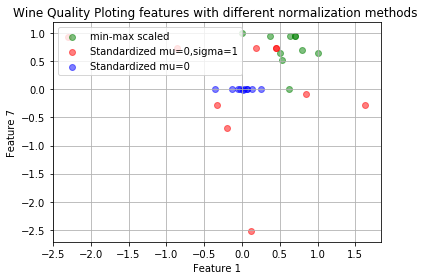

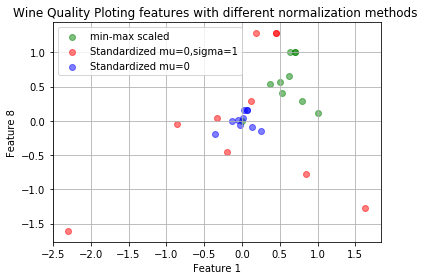

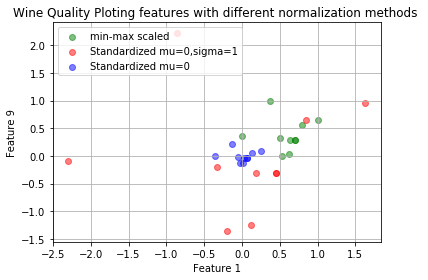

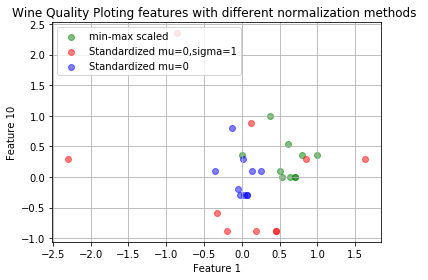

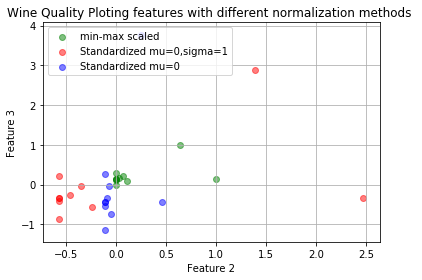

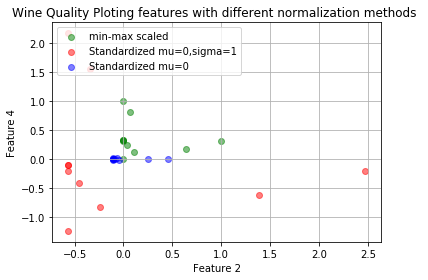

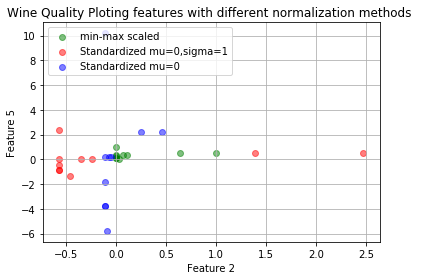

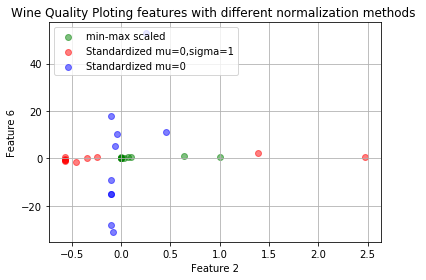

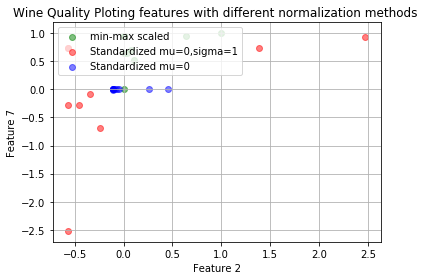

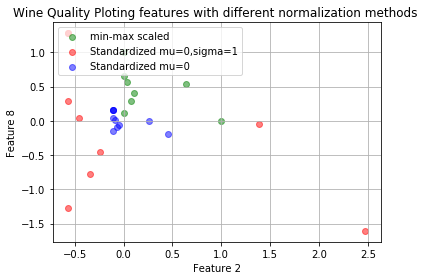

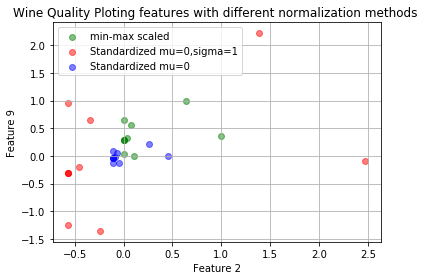

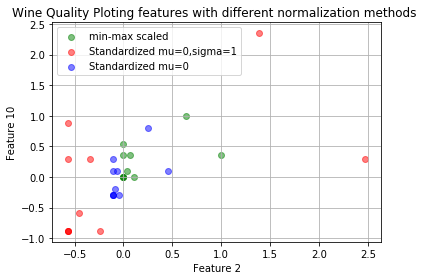

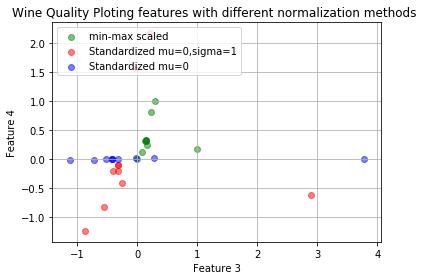

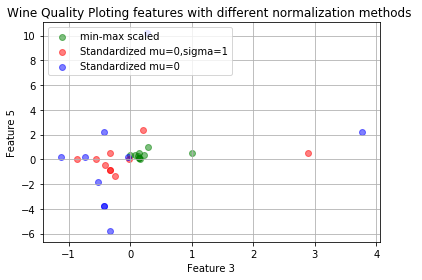

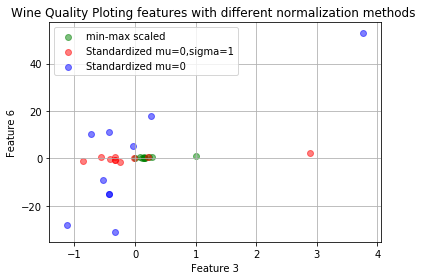

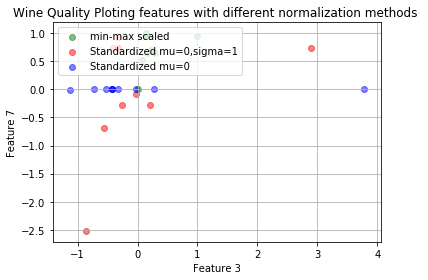

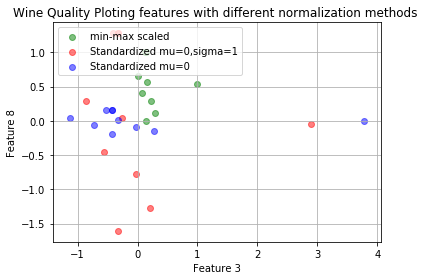

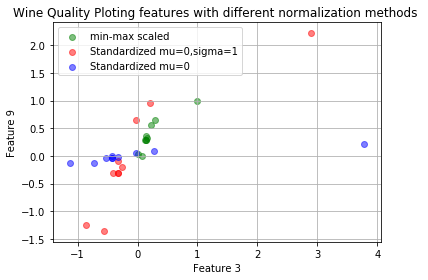

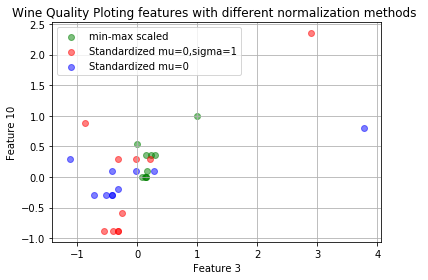

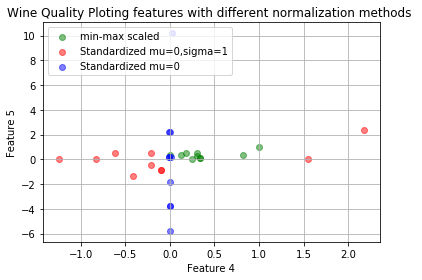

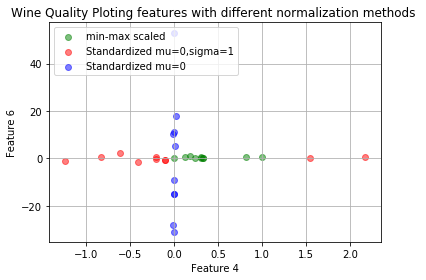

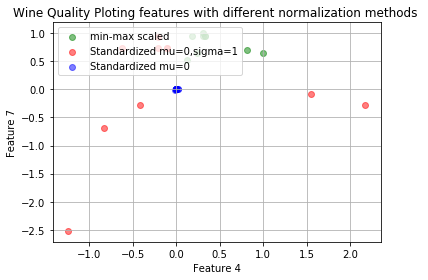

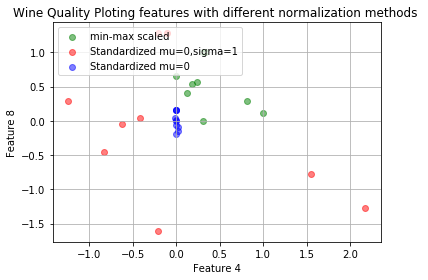

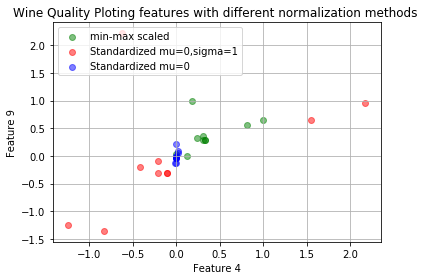

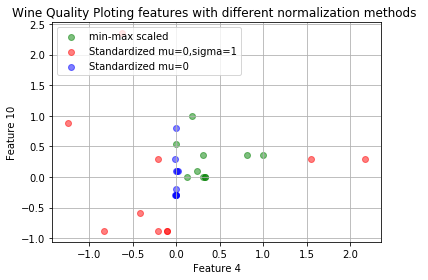

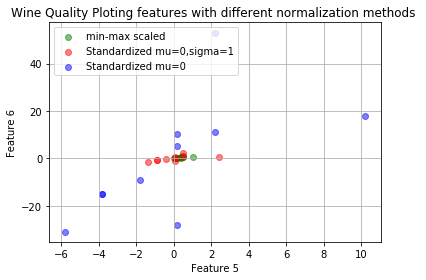

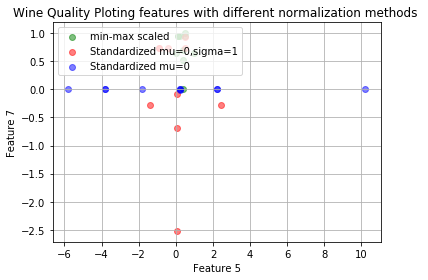

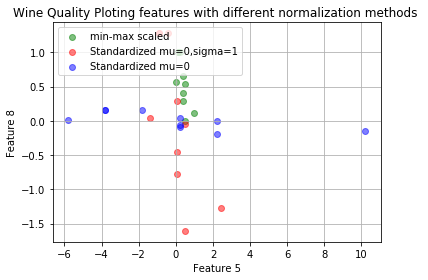

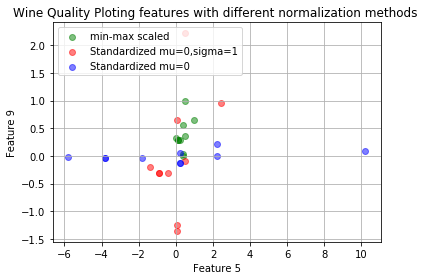

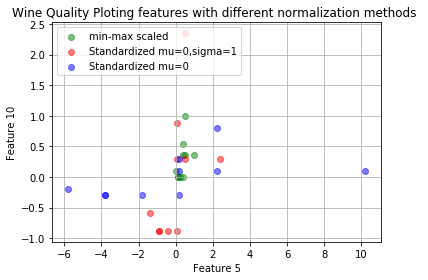

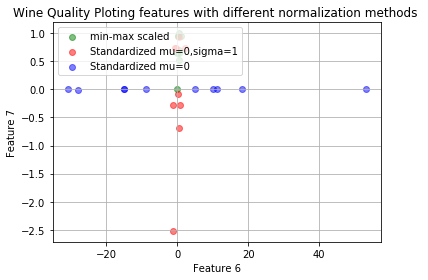

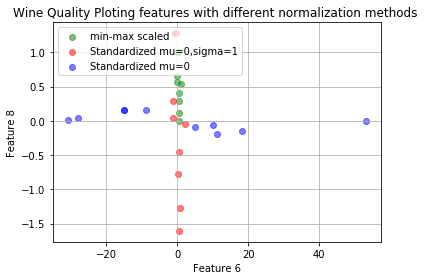

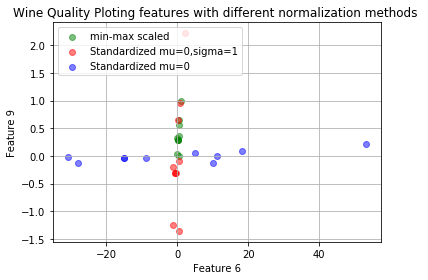

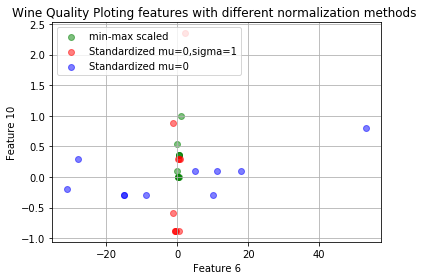

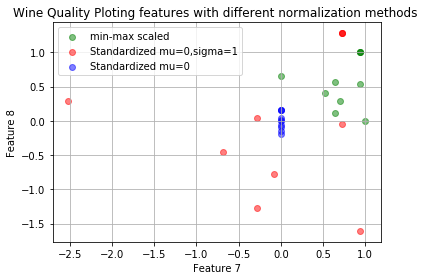

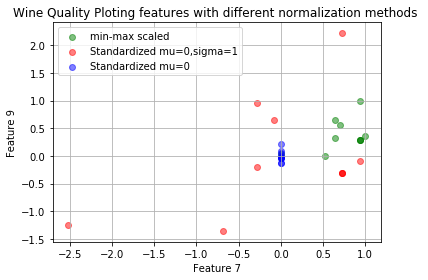

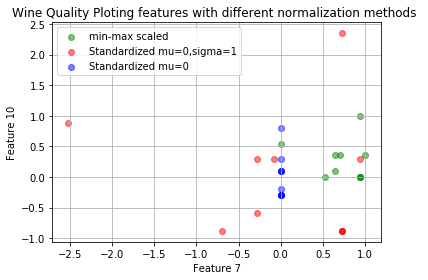

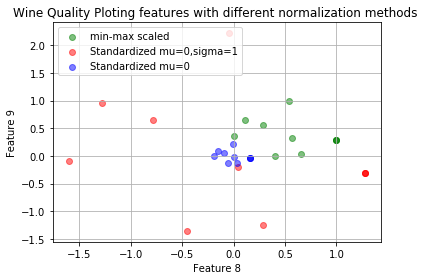

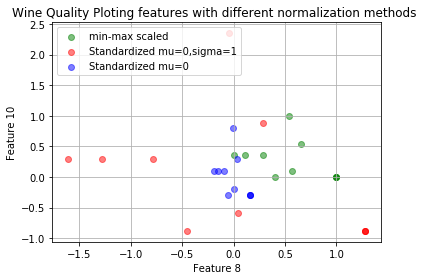

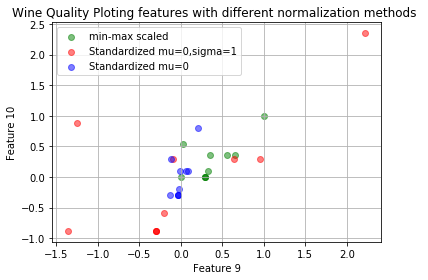

In [13]:
ric=1
for m in range(10):
      for s in range(10):
                #matrix1[m,s]=a.iloc[:,m].corr(a.iloc[:,s])
                p=m+s+1
                if p<=10:
                    plt.figure(ric)
                    plt.scatter(normalized_minmax[:,m], normalized_minmax[:,p],color='green', label='min-max scaled', alpha=0.5)
                    plt.scatter(normalized_us[:,m], normalized_us[:,p],color='red', label='Standardized mu=0,sigma=1', alpha=0.5)
                    plt.scatter(normalized_u[:,m], normalized_u[:,p],color='blue', label='Standardized mu=0', alpha=0.5)
                    plt.title('Wine Quality Ploting features with different normalization methods ')
                    plt.xlabel('Feature %s' %m)
                    plt.ylabel('Feature %s' %p)
                    plt.legend(loc='upper left')
                    plt.grid()
                    plt.tight_layout()
                    ric=ric+1
                    

CONCLUSION
In the present homework, it was validated different kind of normalization methods. In addition, it was found different distance metrics among instances. 